In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_after_wrangle = pd.read_csv('data_after_wrangle.csv')

#### Firstly, lets look at the total success rate of all launch missions

array([<AxesSubplot:ylabel='FlightNumber'>], dtype=object)

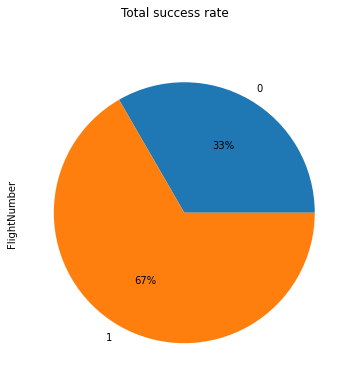

In [3]:
df_after_wrangle.groupby('Success')['FlightNumber'].nunique().plot.pie(subplots=True, 
                                                                       figsize=(11, 6), autopct='%1.0f%%',
                                                                      title='Total success rate')

#### For those launch mission intend to recycle the first stage rocket booster, a launch pad will be involved <br>
There are two types of launch type: <br>
> ASDS stands for a drone ship on the ocean <br>
> RTLS stands for groud pad

array([<AxesSubplot:ylabel='FlightNumber'>], dtype=object)

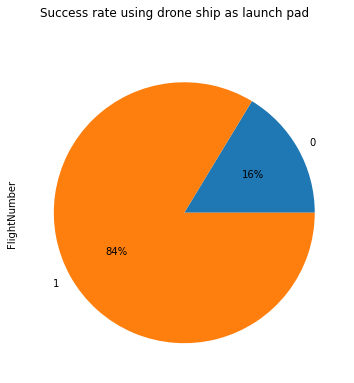

In [4]:
groupby_pad_type = df_after_wrangle.groupby(['pad_type'])
asds = groupby_pad_type.get_group('ASDS')
rtls = groupby_pad_type.get_group('RTLS')
asds.groupby('Success')['FlightNumber'].nunique().plot.pie(subplots=True, 
                                                           figsize=(11, 6), autopct='%1.0f%%',
                                                          title='Success rate using drone ship as launch pad')

array([<AxesSubplot:ylabel='FlightNumber'>], dtype=object)

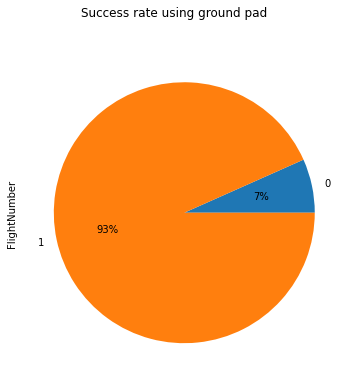

In [5]:
rtls.groupby('Success')['FlightNumber'].nunique().plot.pie(subplots=True, figsize=(11, 6), 
                                                           autopct='%1.0f%%',
                                                          title='Success rate using ground pad')

### exploring orbit types

<AxesSubplot:title={'center':'Number of missions to each orbit'}, xlabel='Orbit'>

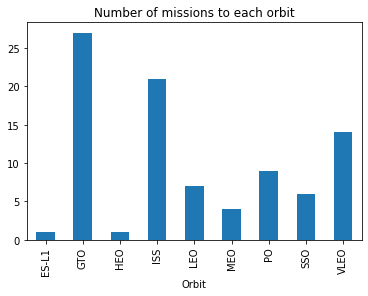

In [6]:
df_after_wrangle.groupby('Orbit')['FlightNumber'].nunique().plot.bar(title='Number of missions to each orbit')

<AxesSubplot:title={'center':'Average pay load mass to each orbit'}, xlabel='Orbit'>

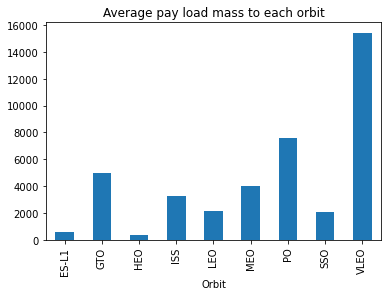

In [7]:
df_after_wrangle.groupby('Orbit')['PayloadMass'].mean().plot.bar(title='Average pay load mass to each orbit')

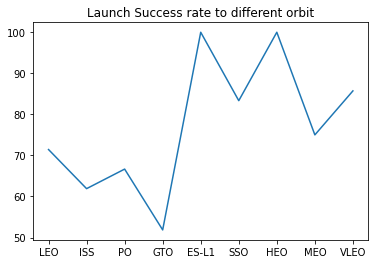

In [8]:
orbit_success_dict = {}
orbit_types = df_after_wrangle['Orbit'].unique()
groupby_orbit = df_after_wrangle.groupby(['Orbit'])
for orbit_type in orbit_types:
    temp = groupby_orbit.get_group(f'{orbit_type}')
    temp2 = temp['Success'].value_counts(normalize=True).mul(100).astype(float)
    orbit_success_dict[f'{orbit_type}'] = temp2[1]
orbit = list(orbit_success_dict.keys())          
success_rate = list(orbit_success_dict.values())  
plt.title('Launch Success rate to different orbit')
plt.plot(orbit, success_rate)

### exploring the launch site

<AxesSubplot:title={'center':'Average Pay load mass of each launch site'}, xlabel='LaunchSite'>

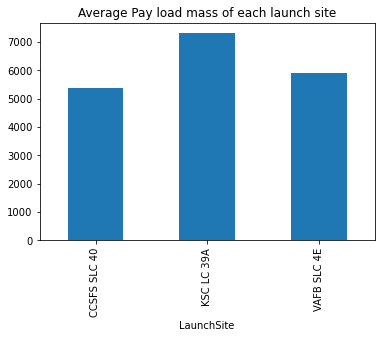

In [9]:
df_after_wrangle.groupby('LaunchSite')['PayloadMass'].mean().plot.bar(title='Average Pay load mass of each launch site')

<AxesSubplot:title={'center':'Number of Missions in different Launch site'}, xlabel='LaunchSite'>

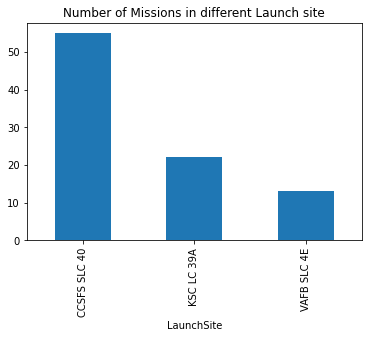

In [10]:
df_after_wrangle.groupby('LaunchSite')['FlightNumber'].count().plot.bar(title='Number of Missions in different Launch site')

<BarContainer object of 3 artists>

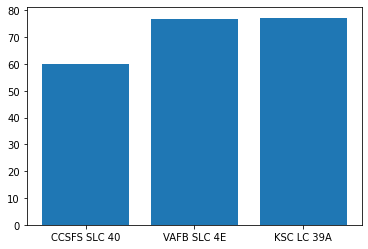

In [11]:
launchsite_success_dict = {}
launchsites = df_after_wrangle['LaunchSite'].unique()
groupby_launchsite = df_after_wrangle.groupby(['LaunchSite'])
for launchsite in launchsites:
    temp = groupby_launchsite.get_group(f'{launchsite}')
    temp2 = temp['Success'].value_counts(normalize=True).mul(100).astype(float)
    launchsite_success_dict[f'{launchsite}'] = temp2[1]
plt.bar(launchsite_success_dict.keys(), launchsite_success_dict.values())

### Exploring if the first stage rocket booster has been reused

In [12]:
groupby_serial = df_after_wrangle.groupby(['Serial'])
df_after_wrangle['Reused'].value_counts()

False    53
True     37
Name: Reused, dtype: int64

In [13]:
df_after_wrangle['Serial'].mode()

0    B1049
Name: Serial, dtype: object

In [14]:
print(f'The B1049 booster has been reused for {len(groupby_serial.get_group("B1049").index)} times')

The B1049 booster has been reused for 6 times


In [15]:
groupby_serial.get_group('B1049')['Orbit'].value_counts()

VLEO    4
GTO     1
PO      1
Name: Orbit, dtype: int64

In [16]:
max_reused = df_after_wrangle['ReusedCount'].max()
core_max_reused = df_after_wrangle.loc[df_after_wrangle['ReusedCount']==max_reused]
core_max_reused['Serial'].unique()

array(['B1051', 'B1058', 'B1060'], dtype=object)

By grouping the dataset with serial number, it is shown that B1049 core had been reused for 6 times, but the data in the column ReusedCount shows that core B1051, B1058 and B1060 had been reused for 12 times. This result suggest that there are several launches not published. 

### Let's explore the affect of the landing pad

<BarContainer object of 5 artists>

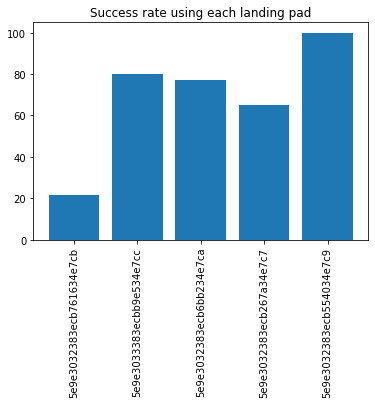

In [17]:
lp_success_dict = {}
lps = df_after_wrangle['LandingPad'].unique()
groupby_lp = df_after_wrangle.groupby(['LandingPad'])
for lp in lps:
    temp = groupby_lp.get_group(f'{lp}')
    temp2 = temp['Success'].value_counts(normalize=True).mul(100).astype(float)
    lp_success_dict[f'{lp}'] = temp2[1]
plt.title('Success rate using each landing pad')
plt.xticks(rotation=90)
plt.bar(lp_success_dict.keys(), lp_success_dict.values())

<BarContainer object of 5 artists>

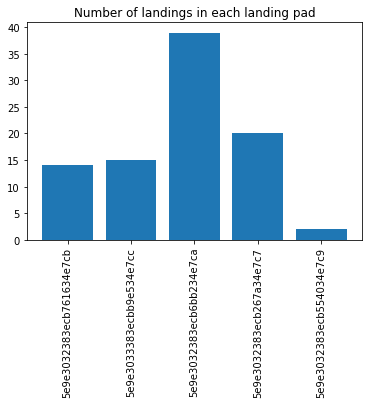

In [18]:
launch_number_dict ={}
for lp in lps:
    temp = groupby_lp.get_group(f'{lp}')
    temp2 = temp['FlightNumber'].count()
    launch_number_dict[f'{lp}'] = temp2
plt.title('Number of landings in each landing pad')
plt.xticks(rotation=90)
plt.bar(launch_number_dict.keys(), launch_number_dict.values())

### Let's look at the success mission yearly trend of launches

In [19]:
df_after_wrangle[['Year', 'Month', 'Day']] = df_after_wrangle['Date'].str.split('-', 2, expand=True)

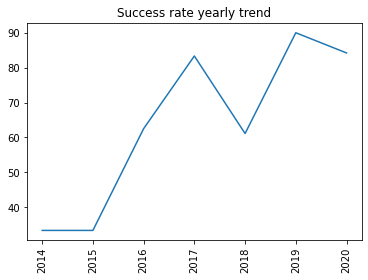

In [20]:
year_success_dict = {}
years = df_after_wrangle['Year'].unique()
groupby_year = df_after_wrangle.groupby(['Year'])
for year in years:
    if int(year) > 2013:
        temp = groupby_year.get_group(f'{year}')
        temp2 = temp['Success'].value_counts(normalize=True).mul(100).astype(float)
        year_success_dict[f'{year}'] = temp2[1]
    else:
        pass
plt.xticks(rotation=90)
plt.title('Success rate yearly trend')
plt.plot(year_success_dict.keys(), year_success_dict.values())